# 项目：指导四轴飞行器学会飞行

设计一个能够使四轴飞行器飞行的智能体，然后使用你选择的强化学习算法训练它！

请尝试运用你在这一单元中学到的知识，看看哪个方法效果最好，当然你也可以自己想出创新型方法并测试它们。
## 说明

请查看目录下的文件，以更好地了解项目结构。 

- `task.py`：在本文件中定义你的任务（环境）。
- `agents/`：本文件夹中包含强化学习智能体。
    - `policy_search.py`：我们为你提供了一个智能体模板。
    - `agent.py`：在本文件中开发你的智能体。
- `physics_sim.py`：本文件中包含四轴飞行器模拟器。**请勿修改本文件**。

在本项目中，你需要在 `task.py` 中定义你的任务。尽管我们为你提供了一个任务示例，来帮助你开始项目，但你也可以随意更改这个文件。在这个 notebook 中，你还将学习更多有关修改这个文件的知识。

你还需要在 `agent.py` 中设计一个强化学习智能体，来完成你选择的任务。

我们也鼓励你创建其他文件，来帮助你整理代码。比如，你也许可以通过定义一个 `model.py` 文件来定义其他你需要的神经网络结构。

## 控制四轴飞行器

在下方的代码中，我们提供了一个智能体示例，来示范如何使用模拟器来控制四轴飞行器。这个智能体比你在 notebook 中需要测试的智能体（在 `agents/policy_search.py` 中）更加简单！

这个智能体通过设置飞行器四个轴上的转速来控制飞行器。`Basic_Agent` 类中提供的智能体将会随机为四个轴指定动作。这四个速度将通过 `act` 方法以四个浮点数列表的形式返回。

在本项目中，你将在 `agents/agent.py` 中实现的智能体会以更加智能的方法进行指定的动作。

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
                            
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

运行下方代码，让智能体指定动作来控制四轴飞行器。

请随意更改我们提供的 `runtime`，`init_pose`，`init_velocities` 和 `init_angle_velocities` 值来更改四轴飞行器的初始条件。

下方的 `labels` 列表为模拟数据的注释。所有的信息都储存在 `data.txt` 文档中，并保存在 `results` 目录下。

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

在进行模拟时，请运行下方的代码来查看四轴飞行器的位置变化。

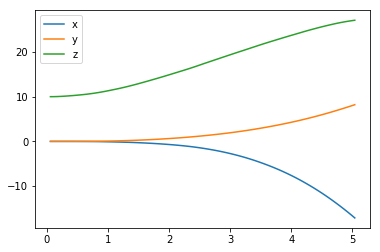

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

下方代码输出了四轴飞行器的速度。

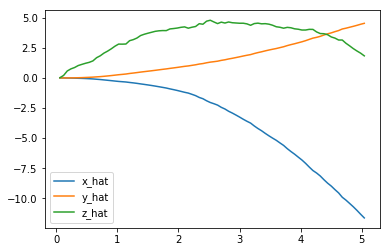

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

接下来，你可以绘制欧拉角 (Euler angles)（四轴飞行器围绕 $x$-，$y$- 和 $z$-轴的旋转）的图表，

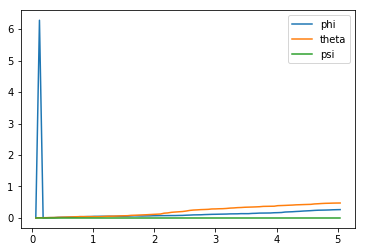

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

在绘制每个欧拉角的速度（每秒的弧度）图之前。

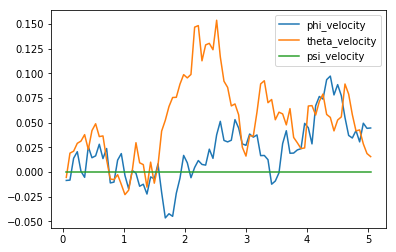

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

最后，你可以使用下方代码来输出智能体选择的动作。

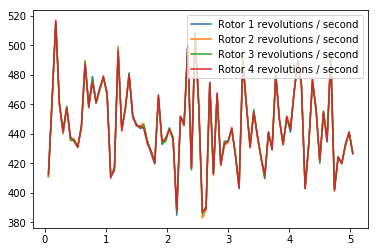

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

在指定任务之前，你需要在模拟器中衍生环境状态。运行下方代码来在模拟结束时输出以下变量值：

- `task.sim.pose`：四周飞行器在 ($x,y,z$) 坐标系中的位置和欧拉角。
- `task.sim.v`：四轴飞行器在 ($x,y,z$) 坐标系中的速度。
- `task.sim.angular_v`：三个欧拉角的弧度/每秒。

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-17.11440331   8.20426039  27.09430249   0.26406529   0.47382109   0.        ]
[-11.63428898   4.53915653   1.83560073]
[ 0.04456664  0.01551881  0.        ]


在 `task.py` 中的任务示例中，我们使用了四轴飞行器六个维度的动作来构建每个时间步的环境状态。然而，你也可以按照自己的意愿更改任务，你可以添加速度信息来扩大状态向量，也可以使用任何动作、速度和角速度的组合，并构造适用于你的任务的环境状态。

## 任务

在 `task.py` 中，我们为你提供了一个任务示例。请在新窗口中打开这个文件。

使用 `__init__()` 方法来初始化指定本任务所需的几个变量。

- 模拟器作为 `PhysicsSim` 类（来自 `physics_sim.py` 文件）的示例进行初始化。
- 受到 DDPG 论文中研究方法的启发，我们使用了重复调用动作的方法。对于智能体的每一个时间步，我们将利用 `action_repeats` 时间步来进行模拟。如果你并不熟悉这种方法，可以阅读 [DDPG 论文](https://arxiv.org/abs/1509.02971)的结论部分。
- 我们设置了状态向量中每个分量的数值。在任务示例中，我们只设置了六个维度的动作信息。为了设定向量大小（`state_size`），我们必须考虑重复的动作。
- 任务环境通常是一个四维动作空间，每个轴有一个输入（`action_size=4`）。你可以设置每个输入的最小值（`action_low`）和最大值（`action_high`）。
- 我们在文件中提供的任务示例将使智能体达到目标位置。我们将目标位置设置为一个变量。

`reset()` 方法将重置模拟器。每当阶段结束时，智能体都将调用此方法。你可以查看下方代码中的例子。

`step()` 方法是最重要的一个方法。它将接收智能体选择的动作 `rotor_speeds`，并准备好下一个状态，同时返回给智能体。接着，你将通过 `get_reward()` 计算奖励值。当超过规定时间，或是四轴飞行器到达模拟器边缘时，这一阶段将视作结束。

接下来，你将学习如何测试这个任务中智能体的性能。

## 智能体

`agents/policy_search.py` 文件中提供的智能体示例使用了非常简单的线性策略，将动作向量视作状态向量和矩阵权重的点积直接进行计算。接着，它通过添加一些高斯噪声来随机干扰参数，以产生不同的策略。根据每个阶段获得的平均奖励值（`score`），它将记录迄今为止发现的最佳参数集以及分数的变化状态，并据此调整比例因子来扩大或减少噪音。

请运行下方代码来查看任务示例中智能体的性能。

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Saving stats ['episode', 'total_reward'] to out\stats_2018-05-30_15-08-07.csv
Episode = 1000, score =  -5.820 (best =  -5.798), noise_scale = 3.2555

           episode  total_reward
count  1000.000000   1000.000000
mean    500.500000    -29.488999
std     288.819436      1.482773
min       1.000000    -35.160244
25%     250.750000    -29.127124
50%     500.500000    -29.103281
75%     750.250000    -29.065681
max    1000.000000    -28.988393
   episode  total_reward
0        1    -29.107969
1        2    -29.107692
2        3    -29.107637
3        4    -29.107643
4        5    -29.107822


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


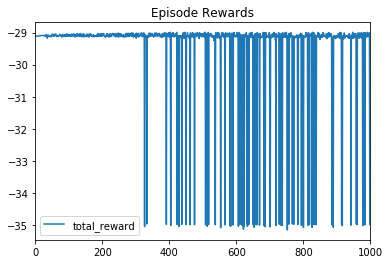

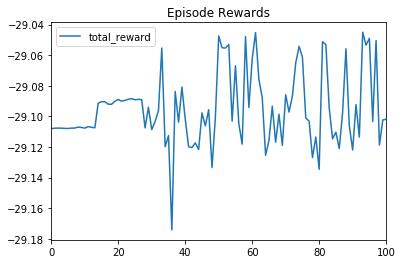

In [10]:
import pandas as pd

df_stats = pd.read_csv('out\stats_2018-05-30_15-08-07.csv')
#print(df_stats)
print(df_stats.describe())
print(df_stats.head(5))

df_stats[['total_reward']].plot(title="Episode Rewards")
df_stats.ix[0:100,['total_reward']].plot(title="Episode Rewards")
#df_stats.ix[400:500,['total_reward']].plot(title="Episode Rewards")

这个智能体的性能想必十分糟糕！现在轮到你出场了！

## 定义任务，设计并训练你的智能体！

修改 `task.py` 文件来指定你所选择的任务。如果你不确定选择什么任务，你可以教你的四轴飞行器起飞、盘旋、着陆或是达到指定位置。


在指定任务后，使用 `agents/policy_search.py` 中的智能体示例作为模板，来在 `agents/agent.py` 中定义你自己的智能体。你可以随意从智能体示例中借用你需要的元素，包括如何模块化你的代码（使用 `act()`，`learn()` 和 `reset_episode_vars()` 等辅助方法）。

请注意，你指定的第一个智能体和任务**极有可能**无法顺利进行学习。你将需要改进不同的超参数和奖励函数，直到你能够获得不错的结果。

在开发智能体的时候，你还需要关注它的性能。参考下方代码，建立一个机制来存储每个阶段的总奖励值。如果阶段奖励值在逐渐上升，说明你的智能体正在学习。

In [1]:
## TODO: Train your agent here.

import sys
import pandas as pd
#from agents.policy_gradients import DDPG
from agents.policy_gradients_ddpg import DDPG
#from Takeoff_task import Task
from takeoff_task import Task
import numpy as np

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task)

plot_data = {x : [] for x in ['episode', 'total_reward']}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            plot_data['episode'].append(i_episode)
            plot_data['total_reward'].append(agent.total_reward)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

Using TensorFlow backend.


Saving stats ['episode', 'total_reward'] to out\stats_2018-06-07_23-03-43.csv
Episode = 1000, score =  33.551 (best =  33.611)

## 绘制阶段奖励

请绘制智能体在每个阶段中获得的总奖励，这可以是单次运行的奖励值，也可以是多次运行的平均值。

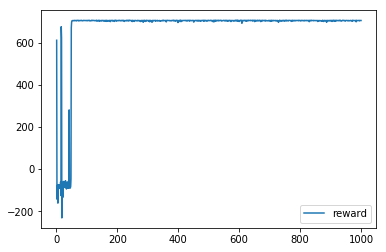

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the rewards
plt.plot(plot_data['episode'], plot_data['total_reward'],label="reward")

plt.legend()
_ = plt.ylim()

           episode  total_reward
count  1000.000000   1000.000000
mean    500.500000    453.746345
std     288.819436    104.941957
min       1.000000   -883.295248
25%     250.750000    473.146763
50%     500.500000    473.345555
75%     750.250000    473.478842
max    1000.000000    473.845371
   episode  total_reward
0        1    449.905217
1        2    -84.866633
2        3    -49.745860
3        4    -56.493370
4        5    -61.314090


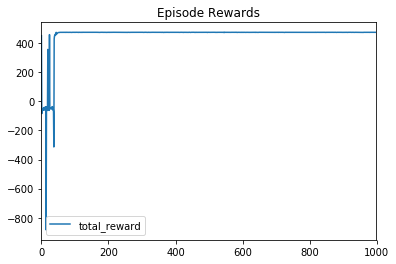

In [3]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df_stats = pd.read_csv('out\stats_2018-06-07_21-31-26.csv')
#print(df_stats)
print(df_stats.describe())
print(df_stats.head(5))

df_stats[['total_reward']].plot(title="Episode Rewards")
#df_stats.ix[0:200,['total_reward']].plot(title="Episode Rewards")
#df_stats.ix[400:500,['total_reward']].plot(title="Episode Rewards")


In [4]:
%load_ext autoreload
%autoreload 2

'''用训练好的模型，控制飞行器起飞，起飞数据存在DDPG_data10.txt中'''

import csv
import numpy as np

file_output = 'DDPG_data10.txt'                         # file name for saved results

done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode() # start a new episode
    while True:
        rotor_speeds = agent.act(state)
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break
            

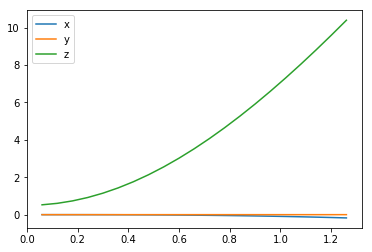

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

'''画出位置变化曲线'''

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

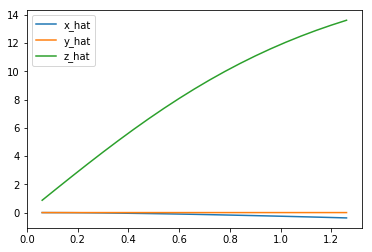

In [6]:
'''画出速度变化曲线'''

plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()


In [7]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
'''输出最终的位置等信息'''
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -1.74370971e-01   3.59223376e-05   1.03897792e+01   3.17574402e-05
   3.24940954e-02   0.00000000e+00]
[ -3.77680848e-01   1.77693292e-04   1.36081526e+01]
[  3.55483082e-05   2.62674872e-02   0.00000000e+00]


## 回顾

**问题 1**：请描述你在 `task.py` 中指定的任务。你如何设计奖励函数？

**回答**：

**问题 2**：请简要描述你的智能体，你可以参考以下问题：

- 你尝试了哪些学习算法？哪个效果最好？
- 你最终选择了哪些超参数（比如 $\alpha$，$\gamma$，$\epsilon$ 等）？
- 你使用了什么样的神经网络结构（如果有的话）？请说明层数、大小和激活函数等信息。

**回答**：

**问题 3**：根据你绘制的奖励图，描述智能体的学习状况。

- 学习该任务是简单还是困难？
- 该学习曲线中是否存在循序渐进或急速上升的部分？
- 该智能体的最终性能有多好？（比如最后十个阶段的平均奖励值）

**回答**：

**问题 4**：请简要总结你的本次项目经历。你可以参考以下问题：

- 本次项目中最困难的部分是什么？（例如开始项目、运行 ROS、绘制、特定的任务等。）
- 关于四轴飞行器和你的智能体的行为，你是否有一些有趣的发现？

**回答**：

In [ ]:

答问题1：在Takeoff_task.py中指定的是起飞任务，让飞机起飞到高度为10的位置。
奖励函数设计如下：

def get_reward(self):
    
        '''根据飞行器的位置及速度信息综合设计reward。首先根据位置坐标及速度及时间来决定reward的值，每个循环周期给-1的惩罚，
        给与x、y坐标绝对值大小的惩罚，z轴方向速度相关的奖励，正向速度越大奖励越大，最后对reward进行尺度缩放'''
                          
        reward = -1-1.*abs(self.sim.pose[:2] - self.target_pos[:2]).sum()
        #reward += 1.*(self.sim.pose[2])
        if self.sim.v[2]>0:
            reward += 5*self.sim.v[2]
        elif self.sim.v[2]<0:
            reward -=abs(5*self.sim.v[2])                       
        reward=0.3*reward#尺度缩放
        return reward

def step(self, rotor_speeds):
    """Uses action to obtain next state, reward, done."""
    reward = 0
    pose_all = []
    for _ in range(self.action_repeat):
        done = self.sim.next_timestep(rotor_speeds)
        
        '''根据done即当前阶段是否结束，来分别给与不同的reward设置。done=True，若飞行器达到目标位置，则奖励0.3*20，
        否则惩罚0.3*50；done=False,若飞行器达到目标位置，则奖励0.3*10，且done置为True，否则reward按get_reward计算。'''
        
        if done:                
            if self.sim.pose[2] >= self.target_pos[2]:
                reward+=0.3*20                    
            else:
                reward-=0.3*50
        else:
            if self.sim.pose[2] >= self.target_pos[2]:
                reward+=0.3*20
                done=True
            else:
                reward += self.get_reward() 
        pose_all.append(self.sim.pose)
    next_state = np.concatenate(pose_all)
    return next_state, reward, done

    首先，根据飞行器位置与目标位置的绝对距离差来计算奖励；然后，判断若垂直距离大于目标垂直距离，则增加奖励；
    再判断若运行时间大于最大执行时间，则惩罚减少奖励。
    这样设计奖励函数可使飞行器又稳又快的起飞到目标位置。

    
答问题2：根据项目提示，选择了DDPG的深度确定性策略梯度，构建了行动者-评论者方法，设计了回放缓冲区及Ornstein–Uhlenbeck 噪点。
超参数：
        Actor的lr=0.0003#actor的学习率
        Critic的lr=0.001#Critic的学习率
        self.gamma = 0.99  # discount factor
        self.tau = 0.0001  # for soft update of target parameters
        
        # Noise process 噪声参数
        self.exploration_mu = 0
        self.exploration_theta = 0.15
        self.exploration_sigma = 0.2
        
        # Replay memory循环存储区参数
        self.buffer_size = 100000
        self.batch_size = 64
        
神经网络：
        行动者网络结构：1个输入层，3个隐藏层，1个输出层，隐藏层激活函数采用relu，输出层激活函数采用sigmoid    
         # Define input layer (states)   输入层，并做normalization处理
        states = layers.Input(shape=(self.state_size,), name='states')
        layers.normalization.BatchNormalization()                

        # Add hidden layers  隐含层分别采用400、300、200单元数，使用relu激活，并用dropout防止过拟合
        net = layers.Dense(units=400)(states)
        #net=layers.BatchNormalization()(net)
        net=layers.Activation('relu')(net)
        net=layers.Dropout(0.2)(net)
        
        net = layers.Dense(units=300)(net)
        #net=layers.BatchNormalization()(net)
        net=layers.Activation('relu')(net)
        net=layers.Dropout(0.2)(net)
        
        net = layers.Dense(units=200)(net)
        #net=layers.BatchNormalization()(net)
        net=layers.Activation('relu')(net)
        net=layers.Dropout(0.2)(net)
        
        # Add final output layer with sigmoid activation  输出层使用权重初始化，给予较小初始权重，使用sigmoid激活函数
        raw_actions = layers.Dense(units=self.action_size,
                kernel_initializer=initializers.RandomUniform(minval=-0.0003, maxval=0.0003),
                                   activity_regularizer=regularizers.l2(0.0001),name='raw_actions')(net)
        raw_actions=layers.Activation('sigmoid')(raw_actions)

        
        
        评论者网络结构：1个输入层，2个隐藏层，1个输出层，隐藏层激活函数采用relu               
        # Define input layers  输入层，并对state输入做normalization处理
        states = layers.Input(shape=(self.state_size,), name='states')
        layers.normalization.BatchNormalization()
        actions = layers.Input(shape=(self.action_size,), name='actions')
        #layers.normalization.BatchNormalization()


        # Add hidden layer(s) for state pathway  状态向量的隐含层，2层，单元数分别是400、300，relu激活，并加权重正则化和dropout
        net_states = layers.Dense(units=400)(states)       
        #net_states=layers.BatchNormalization()(net_states)
        net_states=layers.Activation('relu')(net_states)
        net_states=layers.Dropout(0.2)(net_states)
        net_states = layers.Dense(units=300)(net_states)
        #net_states=layers.BatchNormalization()(net_states)
        net_states=layers.Activation('relu')(net_states)
        net_states=layers.Dropout(0.2)(net_states)

        # Add hidden layer(s) for action pathway  动作向量的隐含层，2层，单元数分别是400、300，relu激活，并加权重正则化和dropout
        net_actions = layers.Dense(units=400)(actions)
        #net_actions=layers.BatchNormalization()(net_actions)
        net_actions=layers.Activation('relu')(net_actions)
        net_actions=layers.Dropout(0.2)(net_actions)
        net_actions = layers.Dense(units=300)(actions)
        #net_actions=layers.BatchNormalization()(net_actions)
        net_actions=layers.Activation('relu')(net_actions)        
        net_actions=layers.Dropout(0.2)(net_actions)

        # Combine state and action pathways  将state和action子网络合并
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)
        
        # Add final output layer to prduce action values (Q values) 输出层
        Q_values = layers.Dense(units=1,activity_regularizer=regularizers.l2(0.0001),name='q_values')(net)


        
答问题3：该任务对我来说有不小难度，主要是网络结构的设计、奖励函数的设置，及超参数的调试，花了很多时间，踩了许多坑。
进行了1000个阶段的训练，观察奖励曲线，可以发现奖励在训练过程中存在急速上升和下降的过程，这应该就是智能体在不断的探索尝试，
最终reward趋于平稳。训练1000次后，用该智能体控制飞行器完成起飞任务，将飞行器相关数据存在DDPG_data.txt中，画出位置坐标变化曲线，
可以看出x,y坐标基本维持在0附近，z坐标由0快速平滑上升到10，用时约1.2秒。圆满完成任务，性能很好。


答问题4：这次项目断断续续花了很长时间，一开始选做的项目一，花了很长时间配置ROS环境，期间会出现一些莫名的问题，
最后放弃，选做项目二。比较困难的是理清楚强化学习的架构，并搭建出这个架构，看了两遍前面的视频，摸清思路，
然后按照项目的提示，设计任务、智能体，训练过程中通过分析奖励变化图像，不断调节超参数，最终训练出来的智能体能较好的完成起飞任务。
在调参训练时，同一组超参数，有时会出现结果相差较大的奖励曲线。

